# Explore here

## 1) Import required libraries

In [123]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## 2) Load dataset

In [124]:
url_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')

## 3) Understand dataset

In [125]:
print('🔹 Visualize first data points')
print(url_data.head())
print('🔹 Visualize main information')
print(url_data.info())
print(url_data.describe())

🔹 Visualize first data points
                                                 url  is_spam
0  https://briefingday.us8.list-manage.com/unsubs...     True
1                             https://www.hvper.com/     True
2                 https://briefingday.com/m/v4n3i4f3     True
3   https://briefingday.com/n/20200618/m#commentform    False
4                        https://briefingday.com/fan     True
🔹 Visualize main information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB
None
                                         url is_spam
count                                   2999    2999
unique                                  2369       2
top     https://www.bloomberg.com/tosv2.html   False
freq                                      26    

## 4) Process dataset

### 4.1) Convert categorical values to numerical

In [126]:
url_data['is_spam'] = url_data['is_spam'].apply(lambda x: 1 if x == True else 0).astype(int)
print('🔹 Visualize post procesed data points')
print(url_data.head())

# Check amount of spam vs non spam links
print(url_data.shape)
print(f'🔹 The dataset contains {len(url_data.loc[url_data.is_spam == 1])} spam links')
print(f'🔹 The dataset contains {len(url_data.loc[url_data.is_spam  == 0])} non-spam links')

🔹 Visualize post procesed data points
                                                 url  is_spam
0  https://briefingday.us8.list-manage.com/unsubs...        1
1                             https://www.hvper.com/        1
2                 https://briefingday.com/m/v4n3i4f3        1
3   https://briefingday.com/n/20200618/m#commentform        0
4                        https://briefingday.com/fan        1
(2999, 2)
🔹 The dataset contains 696 spam links
🔹 The dataset contains 2303 non-spam links


### 4.2) Handle duplicates

In [127]:
print(f'🔹 The dataset contains {url_data.duplicated().sum()} duplicate values')

if url_data.duplicated().sum() != 0:
    url_data = url_data.drop_duplicates()

print(f'🔹 The dataset now contains {url_data.duplicated().sum()} duplicate values')

🔹 The dataset contains 630 duplicate values
🔹 The dataset now contains 0 duplicate values


### 4.3) Process text with RE library

In [128]:
import re

def preprocess_text(text):
    # Delete characters that are neither letter no space
    text = re.sub(r'[^a-zA-Z ]', " ", text)

    # Delete stand-alone letters
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)

    # Reduce multiple spaces to a single space
    text = re.sub(r'\s+', " ", text).strip().lower()

    # Delete HTML tags
    text = re.sub(r"<.*?>", " ", text)

    return text.split()

url_data['url'] = url_data['url'].apply(preprocess_text)
print(url_data.head())

                                                 url  is_spam
0  [https, briefingday, us, list, manage, com, un...        1
1                           [https, www, hvper, com]        1
2                    [https, briefingday, com, v, i]        1
3          [https, briefingday, com, m, commentform]        0
4                     [https, briefingday, com, fan]        1


### 4.4) Text lemmatization

In [129]:
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
download('wordnet')

lemmatizer = WordNetLemmatizer()
download('stopwords')
stop_words = stopwords.words('english')

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]

    return tokens

url_data['url'] = url_data['url'].apply(lemmatize_text)
print(url_data.head())

                                              url  is_spam
0  [http, briefingday, list, manage, unsubscribe]        1
1                                   [http, hvper]        1
2                             [http, briefingday]        1
3                [http, briefingday, commentform]        0
4                             [http, briefingday]        1


[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4.5) Visualize words in a WordCloud

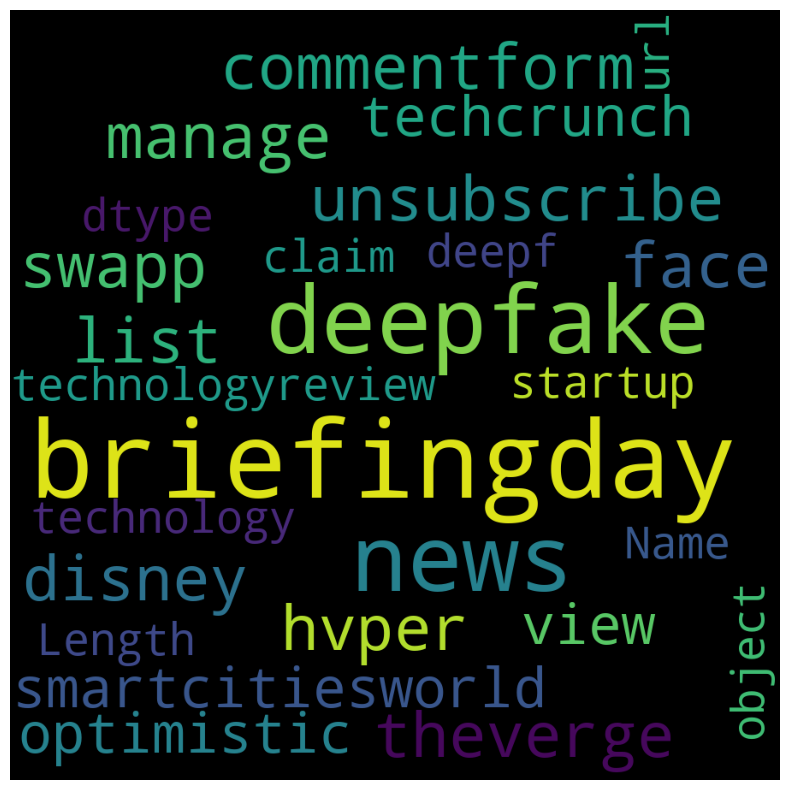

In [130]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=900, height=900, background_color='black', max_words=1000, min_font_size=20, random_state=117).generate(str(url_data["url"]))

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 4.6) Convert words to numeric vectors

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorized_values = url_data['url']
vectorized_values = [' '.join(tokens) for tokens in vectorized_values]
print(vectorized_values)

vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=5)
X = vectorizer.fit_transform(vectorized_values).toarray()
y = url_data['is_spam']

['http briefingday list manage unsubscribe', 'http hvper', 'http briefingday', 'http briefingday commentform', 'http briefingday', 'http brookings interactives reopening america world', 'http reuters investigates special report health coronavirus britain', 'http theatlantic magazine archive supermarket miracle', 'http john bolton book excerpt trump ukraine china', 'http theguardian travel tourism coronavirus pandemic travel industry', 'http future article virus disappeared', 'http narratively quarantined hippy trapped jungle paradise', 'http ourworldindata grapher daily covid case average', 'http spiked online healthy society destroy monument', 'http nytimes interactive business economy container ship built html', 'http aeon essay nostalgia rocket fuel power hope change', 'http youtube watch agyz briefingday curator briefingday source briefingday medium email', 'http popsci story science haribo gummy candy flavor', 'http atlasobscura article coffee', 'http outsideonline john ackerman c

## 5) Divide dataset into train and test subsets

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=117)

## 6) Initialize SVC model

In [133]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=117)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=117)

## 7) Make predictions

In [134]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 8) Evaluate model performances

In [135]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {acc_score:.2%}')

Model accuracy: 93.67%


## 9) Save model

In [136]:
from pickle import dump

dump(model, open("svm_classifier_linear_42.sav", "wb"))